In [1]:
%load_ext autoreload
%autoreload 2

In [22]:
from PCA import *

In [67]:
languages = ['en', 'da', 'is', 'sv', 'nb']

In [68]:
activations_by_language = {
    language: activations[3].filter_by_language(language,return_tensors=True)
    for language in languages
}

In [70]:
avg_vectors = torch.stack(
    tensors=[
        torch.mean(activations, dim=0)
        for activations in activations_by_language.values()
    ],
    dim=0
)
pca = PCA(n_components=2).fit(avg_vectors.cpu())


# transforms all vectors according to the fitted PCA
languages = []
for language, activations in activations_by_language.items():
    languages.extend([language] * activations.shape[0])

vectors = torch.concat(
    tensors=[
        activations
        for activations in activations_by_language.values()
    ],
    dim=0
)
transformed = pca.transform(vectors.cpu())

In [72]:
transformed

array([[-6.75768149,  3.29706061],
       [ 0.31595661, -0.18157732],
       [ 0.16722289, -0.60733134],
       ...,
       [ 0.60646244,  0.09809446],
       [ 0.58763886,  0.21571163],
       [-0.33857545, -0.18353122]])

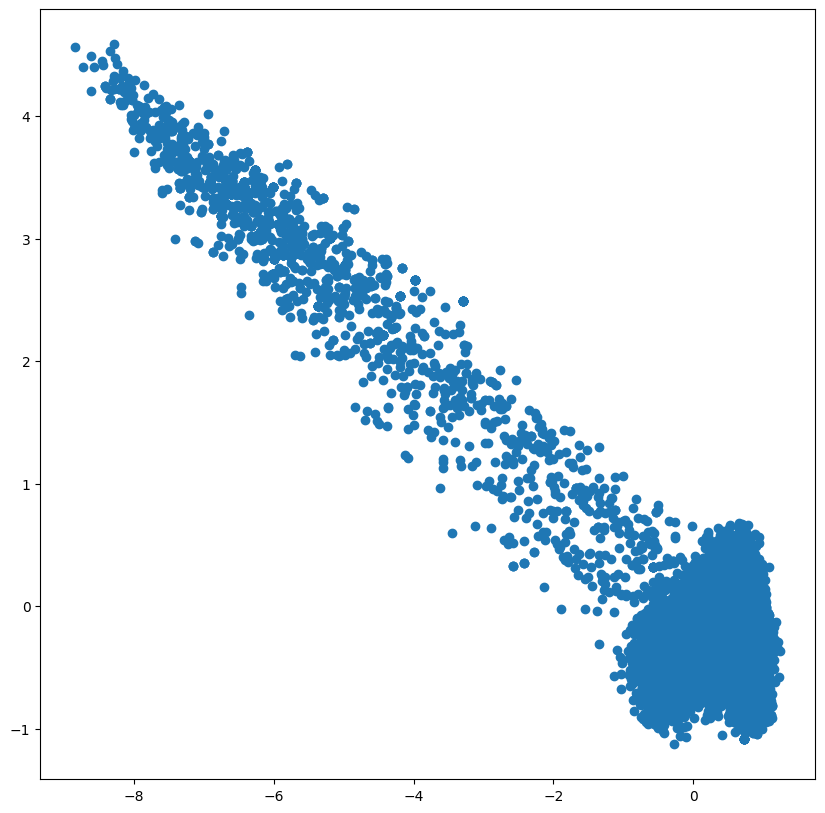

In [73]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

ax.scatter(*transformed.T)

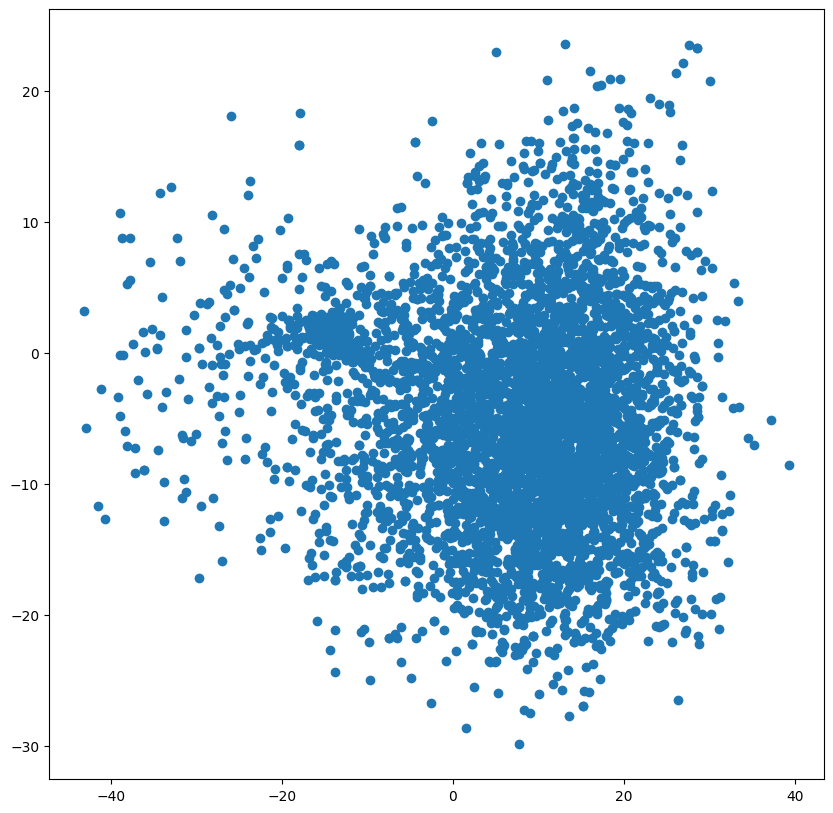

In [75]:
languages = activations[3].label_map.keys()

mean_vectors = [
    torch.mean(activations[3].filter_by_language(language, return_tensors=True), dim=0)
    for language in languages
]

pca = PCA(n_components=2).fit(torch.stack(mean_vectors).cpu())

transformed = {
    language: pca.transform(activations[3].filter_by_language(language, return_tensors=True).cpu())
    for language in languages    
}

fig, ax = plt.subplots(1, 1, figsize=(10,10))

ax.scatter(*transformed['da'].T)

In [41]:
pca = PCA(n_components=2).fit(torch.stack(mean_vectors).cpu())

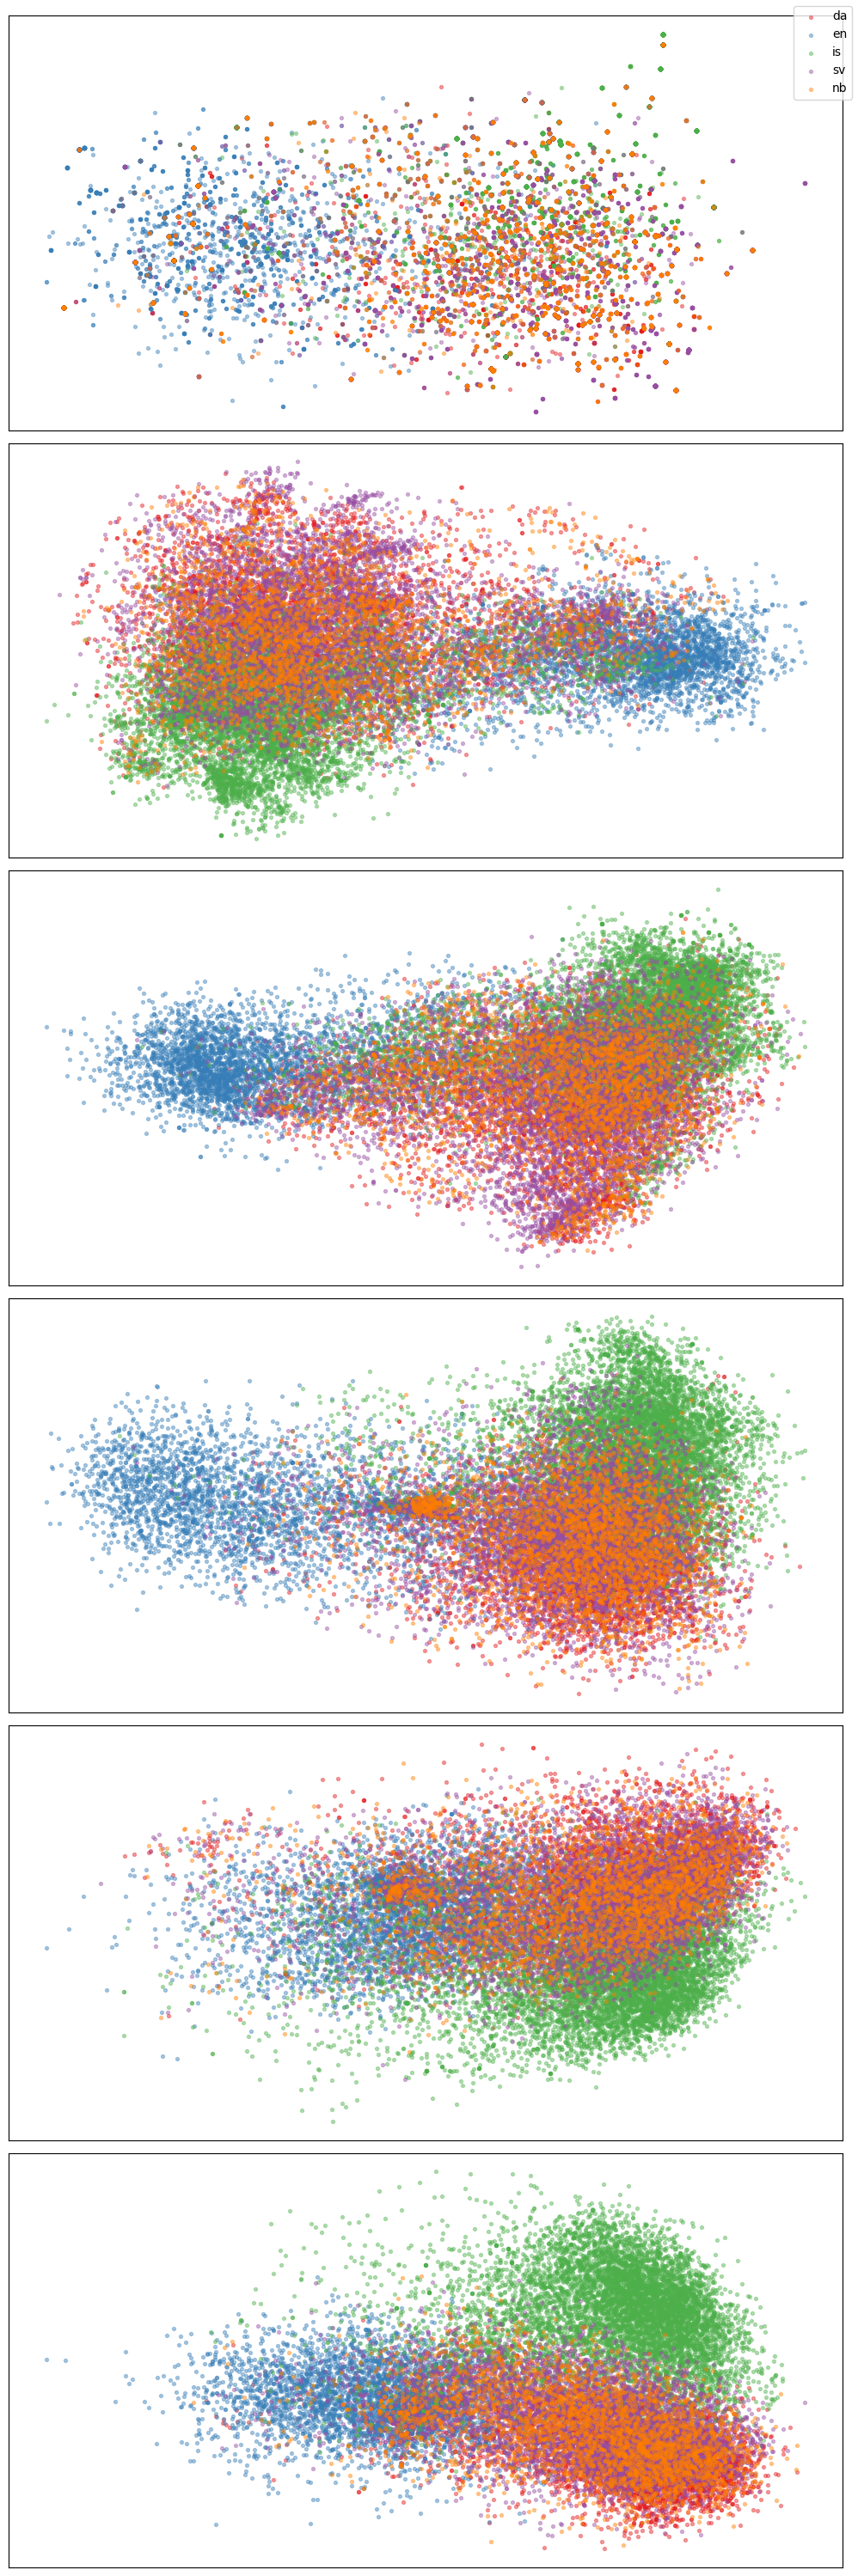

In [76]:
fig, axs = plt.subplots(len(activations), 1, figsize=(10,30))
axs = axs.flatten()


for idx in range(len(activations)):
    ax = axs[idx]
    transformed = compute_PCA(activations[idx])

    plot_PCA(transformed, ax)

lines, labels = axs[0].get_legend_handles_labels()
fig.legend(lines, labels)
fig.tight_layout()